## NECESSARY IMPORTS AND VARIABLES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, cv2, time
from albumentations import (Compose, ColorJitter, HorizontalFlip, RandomRotate90, ChannelDropout, GaussNoise, MotionBlur)
from keras.backend import clear_session

from PIL import Image

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold

In [2]:
batch_size = 16
img_height = 224
img_width = 224
SIZE = 224
num_channels = 3 # RGB
#labels = ['No_Billboard', 'Billboard']
INPUT_SHAPE = (img_height, img_width)
SHAPE = (img_height, img_width, num_channels)

data_dir_path = "/python_programming/FYP_2022/new_billboard_dataset/"

dataset = []  #Many ways to handle data, you can use pandas.
label = []  #Place holders to define add labels. We will add 0 to all no_billboards  images and 1 to billboards.

## LOADING IN THE DATA

In [3]:
no_bilboard_images = os.listdir(data_dir_path + 'No_Billboard/')
for i, image_name in enumerate(no_bilboard_images):    #Remember enumerate method adds a counter and returns the enumerate object

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(data_dir_path + 'No_Billboard/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1
billboard_images = os.listdir(data_dir_path + 'Billboard/')
for i, image_name in enumerate(billboard_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(data_dir_path + 'Billboard/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)

(2184, 224, 224, 3)
(2184,)
Label for this image is:  1


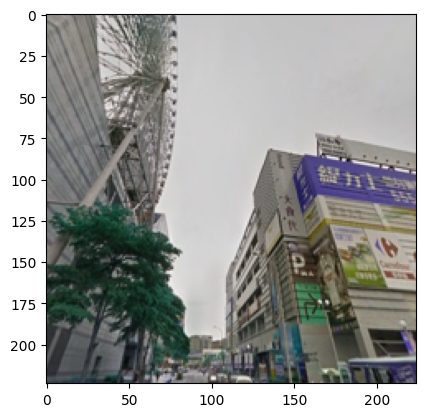

In [ ]:
print(dataset.shape)
print(label.shape)


#Sanity check, view random few mages
import random
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (224, 224, 3)))
print("Label for this image is: ", label[image_number])

In [ ]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

#from keras.utils import normalize
#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)
X_train = X_train / 255.
X_test = X_test / 255.

# Reshape the features to fit the SVM model
X_train =  X_train.reshape(X_train.shape[0], -1)
X_test =  X_test.reshape(X_test.shape[0], -1)


#Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0) #labels

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []


## TRAINING SVM CLASSIFIER

In [ ]:
from sklearn.model_selection import cross_val_score

start_time = time.time()

svmclf_model = SVC(C= 0.42332835345253006, kernel="rbf", gamma=0.01, max_iter=100)
svmclf_model.fit(X_train, y_train)
y_pred = svmclf_model.predict(X_test)
accuracy_score(y_test, y_pred)

print ('train_score:', svmclf_model.score(X_train,y_train))
print ('test_score:', svmclf_model.score(X_test,y_test))

#scores = cross_val_score(svmclf_model, X_train, y_test, cv=10)

#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\sukri\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


train_score: 0.8242701774470521
test_score: 0.8054919908466819


In [ ]:
elapsed_time = time.time() - start_time
print(f"Elapsed time to complete training: {elapsed_time:.3f} seconds")

Elapsed time to complete training: 174.317 seconds


In [ ]:

import pickle

# Save the model
with open('/python_programming/FYP_2022/Models/model/newdataset_svm_modelkfold.pkl', 'wb') as f:
    pickle.dump(svmclf_model, f)


In [ ]:
predictions = svmclf_model.predict(X_test)
actual_ylabel = y_test

#print("The prediction for this image is: ", predictions)
print("The actual label for this image is: ", actual_ylabel)

y_hat = predictions # We take the highest probability
print('prediction label:', y_hat)

#Compare the predictions and labels and get the accuracy
accuracy = np.mean(np.equal(actual_ylabel, y_hat))
print(f"Accuracy: {accuracy:.2f}")

The actual label for this image is:  [1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1
 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0
 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0
 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0]
prediction label: [1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0

misclassified indices: [  3   5   6  16  24  26  34  35  41  44  52  53  57  60  73  88  90  95
  97  98 105 109 112 113 121 122 131 140 145 156 170 174 189 198 201 206
 207 210 213 226 227 228 232 238 250 252 253 260 263 266 267 269 270 277
 288 293 304 307 314 318 319 326 329 336 337 340 341 342 344 346 356 362
 368 371 374 375 376 378 393 396 407 411 412 423 424]
no of missclassification: 85


TypeError: ignored

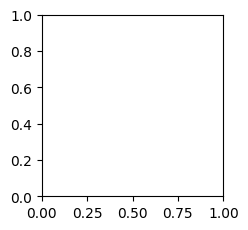

In [ ]:
# Compare y_hat to y_val
misclassified = []
label_comparison =  actual_ylabel == y_hat
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no of missclassification:', len(misclassified))
plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    ax =plt.subplot(9, 7, i+1)
    plt.imshow(X_test[index])
    plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[index], y_hat[index]))
    plt.axis('off')

Calculate evaluation metric: Precision, Recall, F1score, Accuracy, RMSE

In [ ]:
import tensorflow as tf

pre = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()
rootmsqrerror = tf.keras.metrics.RootMeanSquaredError()
auc_roc = tf.keras.metrics.AUC()

In [ ]:
tf.math.confusion_matrix(
    y_test,
    y_hat,
    num_classes=2,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[125,  53],
       [ 32, 227]])>

In [ ]:
pre.update_state(y_test, y_hat)
rec.update_state(y_test, y_hat)
acc.update_state(y_test, y_hat)
rootmsqrerror.update_state(y_test, y_hat)
auc_roc.update_state(y_test, y_hat)


print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')
print(f'RMSE:{rootmsqrerror.result().numpy()}')
print(f'AUC:{auc_roc.result().numpy()}')

f1_score = 2 * (pre.result().numpy() * rec.result().numpy()) / (pre.result().numpy() + rec.result().numpy())

print(f'F1score:{f1_score}')

Precision:0.8107143044471741, Recall:0.876447856426239, Accuracy:0.8054919838905334
RMSE:0.4410306215286255
AUC:0.7893475294113159
F1score:0.8423005619608983


Save model

In [ ]:
path = f"/python_programming/FYP_2022/Models/model/"
svmclf_model.save(os.path.join(path, 'newdataset_svm_modelkfold.h5'))

new_model = tf.keras.models.load_model(os.path.join(path, 'newdataset_svm_modelkfold.h5'))

In [ ]:
newtest = cv2.imread('/python_programming/FYP_2022/billboard_dataset/output1/Billboard/scene_1223.jpg')
plt.imshow(newtest)
plt.show()

resize_newtest = cv2.resize(newtest, (224, 224))
plt.imshow(resize_newtest)
plt.show()
pred_newtest = np.expand_dims(resize_newtest/255, 0)
#print(pred_newtest)

y_pred_newtest = new_model.predict(pred_newtest)
print(y_pred_newtest)
y_pred_newtest = np.argmax(y_pred_newtest, axis = 1)
print(y_pred_newtest)

if y_pred_newtest > 0.5:
  print('Predicted class belongs to billboard class')

else:
  print('Predicted class belongs to no billboad class')

## TRAINING RANDOM FOREST CLASSIFIER

In [ ]:
start_time = time.time()

'''
fold_no = 1

num_folds = 10  # Number of splits for k-fold cross-validation
kf = KFold(n_splits=num_folds)


for train, test in kf.split(inputs, targets):
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
'''
randomclf_model = RandomForestClassifier(n_estimators=73,criterion="log_loss", max_depth=100)
randomclf_model.fit(X_train, y_train)
y_pred = randomclf_model.predict(X_test)
accuracy_score(y_test, y_pred)
'''
  # Generate generalization metrics
    scores = randomclf_model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {randomclf_model.metrics_names[0]} of {scores[0]}; {randomclf_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

    # == Provide average scores ==
    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(0, len(acc_per_fold)):
      print('------------------------------------------------------------------------')
      print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
'''

"\n  # Generate generalization metrics\n    scores = randomclf_model.evaluate(X_test, y_test, verbose=0)\n    print(f'Score for fold {fold_no}: {randomclf_model.metrics_names[0]} of {scores[0]}; {randomclf_model.metrics_names[1]} of {scores[1]*100}%')\n    acc_per_fold.append(scores[1] * 100)\n    loss_per_fold.append(scores[0])\n\n    # Increase fold number\n    fold_no = fold_no + 1\n\n    # == Provide average scores ==\n    print('------------------------------------------------------------------------')\n    print('Score per fold')\n    for i in range(0, len(acc_per_fold)):\n      print('------------------------------------------------------------------------')\n      print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')\n    print('------------------------------------------------------------------------')\n    print('Average scores for all folds:')\n    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')\n    print(f'> Loss: {np.mea

In [ ]:
elapsed_time = time.time() - start_time
print(f"Elapsed time to complete training: {elapsed_time:.3f} seconds")

Elapsed time to complete training: 52.741 seconds


In [ ]:
# Save the model
with open('/python_programming/FYP_2022/Models/model/newdataset_rndmfrstkfold.pkl', 'wb') as f:
    pickle.dump(randomclf_model, f)


In [ ]:
predictions = randomclf_model.predict(X_test)
actual_ylabel = y_test

#print("The prediction for this image is: ", predictions)
print("The actual label for this image is: ", actual_ylabel)

y_hat = predictions # We take the highest probability
print('prediction label:', y_hat)

#Compare the predictions and labels and get the accuracy
accuracy = np.mean(np.equal(actual_ylabel, y_hat))
print(f"Accuracy: {accuracy:.2f}")

The actual label for this image is:  [1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1
 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0
 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0
 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0]
prediction label: [1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0

misclassified indices: [ 18  24  52  53  58  61  63  77  88  95  97 109 145 156 158 198 210 226
 230 252 266 270 291 300 314 318 334 344 349 353 368 369 375 378 382 411
 419 431]
no of missclassification: 38


TypeError: ignored

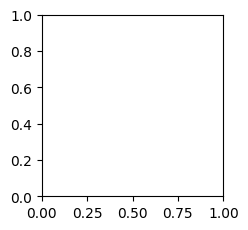

In [ ]:
# Compare y_hat to y_val
misclassified = []
label_comparison =  actual_ylabel == y_hat
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no of missclassification:', len(misclassified))
plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    ax =plt.subplot(9, 7, i+1)
    plt.imshow(X_test[index])
    plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[index], y_hat[index]))
    plt.axis('off')

Calculate evaluation metric: Precision, Recall, F1score, Accuracy, RMSE

In [ ]:
pre = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()
rootmsqrerror = tf.keras.metrics.RootMeanSquaredError()
auc_roc = tf.keras.metrics.AUC()

In [ ]:
tf.math.confusion_matrix(
    y_test,
    y_hat,
    num_classes=2,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[163,  15],
       [ 23, 236]])>

In [ ]:
pre.update_state(y_test, y_hat)
rec.update_state(y_test, y_hat)
acc.update_state(y_test, y_hat)
rootmsqrerror.update_state(y_test, y_hat)
auc_roc.update_state(y_test, y_hat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')
print(f'RMSE:{rootmsqrerror.result().numpy()}')
print(f'AUC:{auc_roc.result().numpy()}')

f1_score = 2 * (pre.result().numpy() * rec.result().numpy()) / (pre.result().numpy() + rec.result().numpy())

print(f'F1score:{f1_score}')

Precision:0.9402390718460083, Recall:0.9111968874931335, Accuracy:0.9130434989929199
RMSE:0.2948839068412781
AUC:0.9134636521339417
F1score:0.9254902301659201


load model

In [ ]:
with open('/python_programming/FYP_2022/Models/model/newdataset_rndmfrstkfold.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
newtest = cv2.imread('/python_programming/FYP_2022/billboard_dataset/output1/Billboard/scene_1223.jpg')
plt.imshow(newtest)
plt.show()

resize_newtest = cv2.resize(newtest, (224, 224))
plt.imshow(resize_newtest)
plt.show()
pred_newtest = np.expand_dims(resize_newtest/255, 0)
#print(pred_newtest)

y_pred_newtest = new_model.predict(pred_newtest)
print(y_pred_newtest)
y_pred_newtest = np.argmax(y_pred_newtest, axis = 1)
print(y_pred_newtest)

if y_pred_newtest > 0.5:
  print('Predicted class belongs to billboard class')

else:
  print('Predicted class belongs to no billboad class')

SVM = 0.67 - 174.317 seconds
Random Forest  = 0.95 - 52.741 seconds